# Importing the Python libraries for data analysis and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# Importing the TensorFlow Library

In [3]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [4]:
df = pd.read_csv(r"D:\Machine Learning Project and Algorithm\ANN Implementation\Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
# Divide the data set into dependent and independent feature

X = df.iloc[:,3:13]   ## Independent features (X): selecting columns from 3 to 12 (using 0-based indexing)
y = df.iloc[:,13]  ## Dependent feature (y): selecting the 13th column

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
# Feature engineering
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
X.drop(['Geography','Gender'],axis=1,inplace=True)

In [10]:
# Concatenating the dummy variables with the original DataFrame
pd.concat([X,geography,gender],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [11]:
#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
X_train, X_test

(array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
         -1.03227043,  1.10643166],
        [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
          0.9687384 , -0.74866447],
        [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
         -1.03227043,  1.48533467],
        ...,
        [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
         -1.03227043,  1.41231994],
        [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
          0.9687384 ,  0.84432121],
        [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
         -1.03227043,  0.32472465]]),
 array([[-0.55204276, -0.36890377,  1.04473698, ...,  0.64259497,
          0.9687384 ,  1.61085707],
        [-1.31490297,  0.10961719, -1.031415  , ...,  0.64259497,
         -1.03227043,  0.49587037],
        [ 0.57162971,  0.30102557,  1.04473698, ...,  0.64259497,
          0.9687384 , -0.42478674],
        ...,
        [-0.74791227, -0.27319958, -1.37744033, ...,  

In [14]:
X_train.shape

(8000, 8)

# Part - 2 ANN: Artificial Neural Networks

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [16]:
#lets initialise the ANN
classifier = Sequential()

In [17]:
# Add the input layer
classifier.add(Dense(units = 8,activation = 'relu'))

In [18]:
#add hidden layer
classifier.add(Dense(units = 7,activation = 'relu'))

In [19]:
classifier.add(Dense(units = 6,activation = 'relu'))

In [20]:
# Adding the output layer
classifier.add(Dense(units = 1,activation = 'sigmoid'))

In [21]:
# Compiling the model
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
import tensorflow
adam=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
adam

In [23]:
## Early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0)

In [24]:
##This will stop the training process if the validation loss does not improve for a specified number of epochs.
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 6s 6ms/step - loss: 0.4981 - accuracy: 0.7962 - val_loss: 0.4526 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4313 - accuracy: 0.7966 - val_loss: 0.4287 - val_accuracy: 0.7986
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4125 - accuracy: 0.8164 - val_loss: 0.4116 - val_accuracy: 0.8277
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3951 - accuracy: 0.8373 - val_loss: 0.3981 - val_accuracy: 0.8319
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3803 - accuracy: 0.8436 - val_loss: 0.3880 - val_accuracy: 0.8413
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3698 - accuracy: 0.8531 - val_loss: 0.3792 - val_accuracy: 0.8440
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3618 - accuracy: 0.8550 - val_loss: 0.3705 - val_accuracy:

In [25]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

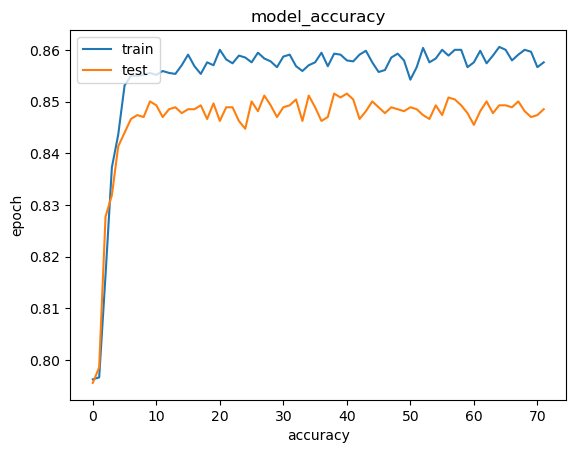

In [26]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

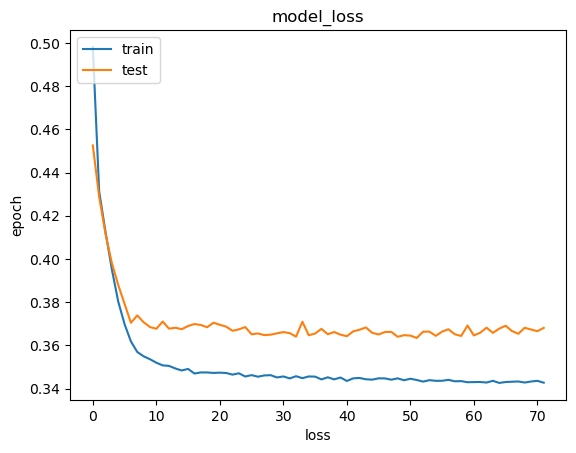

In [27]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [28]:
y_pred= classifier.predict(X_test)
y_pred= (y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [29]:
#confusion matrics
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1512,   83],
       [ 201,  204]], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.858

In [31]:
## Get the weights
classifier.get_weights()

[array([[-0.04065468,  0.02582195, -0.04761147, -0.06514052, -0.17612007,
         -0.03227586, -0.2185646 , -0.05730866],
        [-0.0775082 , -0.62732947, -0.5227684 , -0.07790951,  0.914983  ,
          0.57281905,  0.17647919, -0.14560921],
        [ 0.03815037, -0.4321889 ,  0.04900886,  0.1264767 , -0.03051634,
          0.22593816,  0.08515247, -0.5040248 ],
        [-0.13649818, -0.09292945,  0.21220858, -0.20601705, -0.20485424,
          0.13707355, -0.18056169,  0.18853134],
        [-1.0047029 ,  0.34794408,  0.42426282, -0.02721535, -0.64194876,
          0.7235466 ,  0.30585355,  0.9332173 ],
        [-0.08812711,  0.23512526, -0.25526842,  0.0576839 , -0.02171261,
         -0.02908897, -0.02269369,  0.15074794],
        [-0.3697154 , -0.4827899 ,  0.48669693,  0.96499777, -0.04527949,
          0.04670359, -0.7645042 , -0.11105981],
        [ 0.12208082, -0.13861611, -0.17376328,  0.12363207,  0.11308885,
          0.03465978,  0.17613432, -0.03019792]], dtype=float32),